In [78]:
# Import libraries
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore


In [79]:
data = pd.read_csv('.//archive/housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [81]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [82]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [83]:
from sklearn.model_selection import train_test_split # type: ignore

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']
X.shape,y.shape

((20433, 9), (20433,))

In [84]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [85]:
train_data = X_train.join(y_train)
train_data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1409,-122.07,37.94,36.0,2639.0,488.0,1111.0,476.0,3.5057,NEAR BAY,205100.0
7583,-118.22,33.91,27.0,500.0,159.0,732.0,162.0,2.7426,<1H OCEAN,103100.0
15235,-117.26,32.96,36.0,1721.0,264.0,710.0,282.0,10.1768,NEAR OCEAN,500001.0
15290,-117.31,33.11,7.0,7974.0,1703.0,2904.0,1550.0,4.1282,NEAR OCEAN,188100.0
17317,-120.20,34.61,15.0,2958.0,690.0,1348.0,617.0,3.8582,NEAR OCEAN,215200.0
1367,-122.14,38.01,50.0,1760.0,341.0,741.0,316.0,4.5000,NEAR BAY,178300.0
17482,-119.81,34.44,23.0,3172.0,588.0,1467.0,559.0,4.6806,NEAR OCEAN,288900.0
4566,-118.26,34.07,30.0,929.0,238.0,763.0,214.0,2.5227,<1H OCEAN,187500.0
12309,-116.89,33.48,14.0,1016.0,219.0,443.0,169.0,2.8071,INLAND,137500.0
18136,-122.00,37.35,20.0,4304.0,851.0,2059.0,835.0,5.1674,<1H OCEAN,333000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

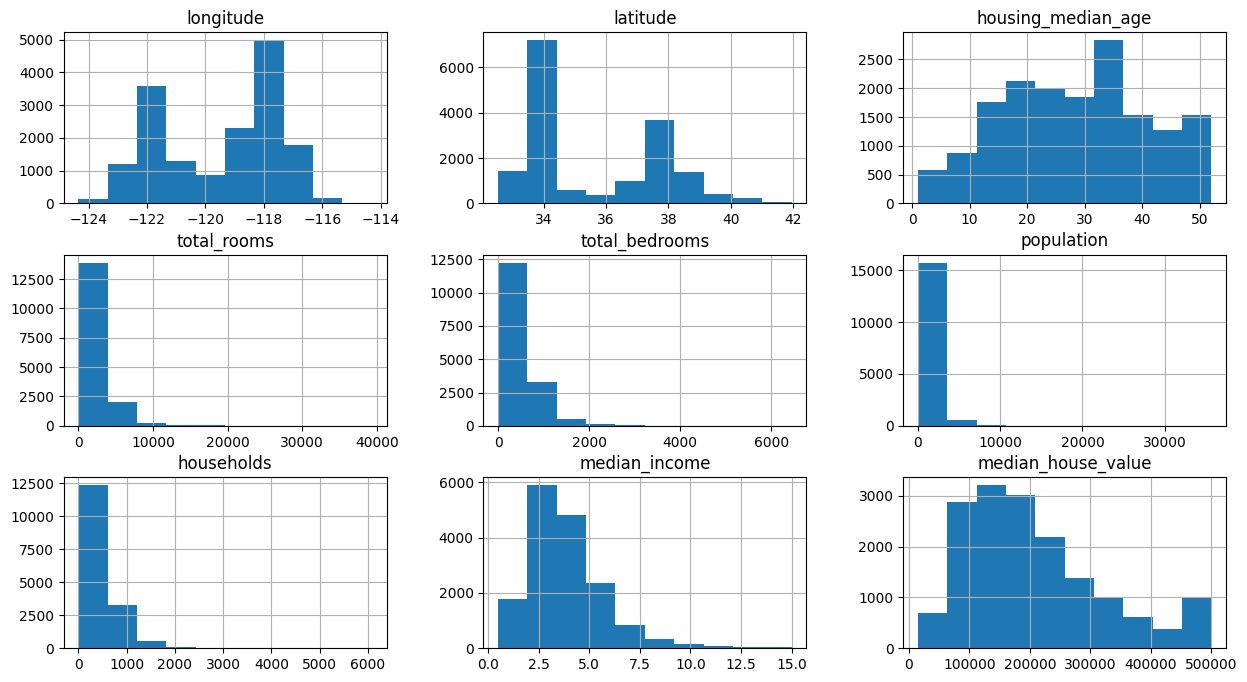

In [86]:
train_data.hist(figsize=(15, 8))

In [87]:
corr = train_data.corr(numeric_only = True)

<Axes: >

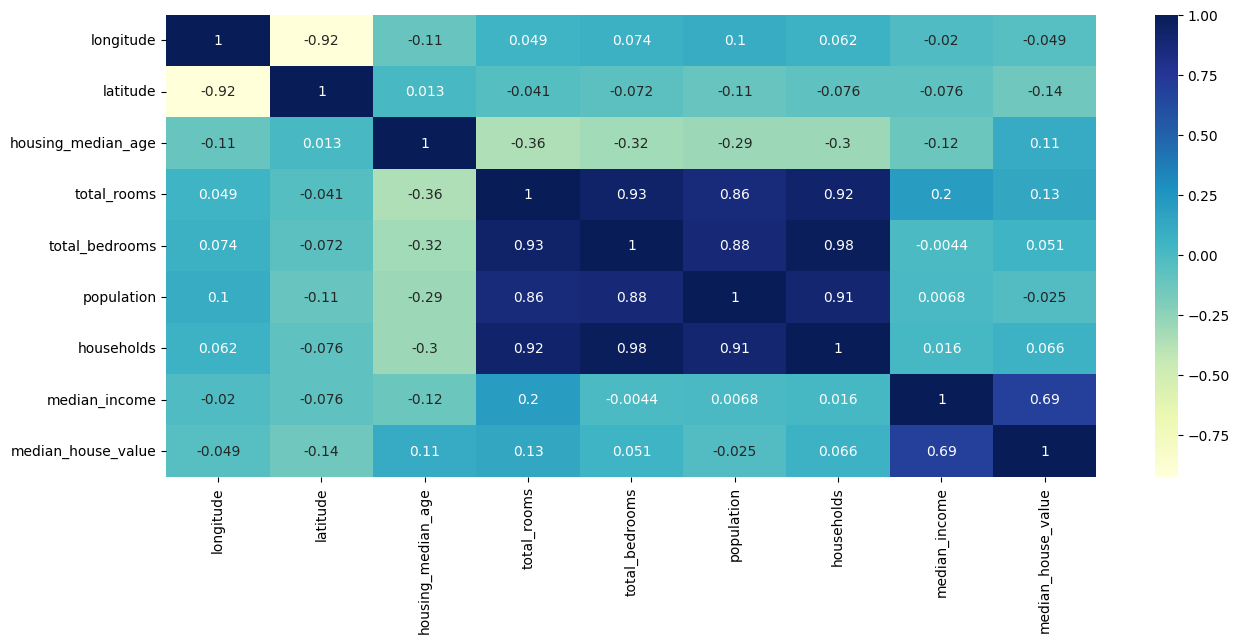

In [88]:
plt.figure(figsize=(15, 6))
sns.heatmap(corr, annot=True,cmap="YlGnBu")

In [89]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

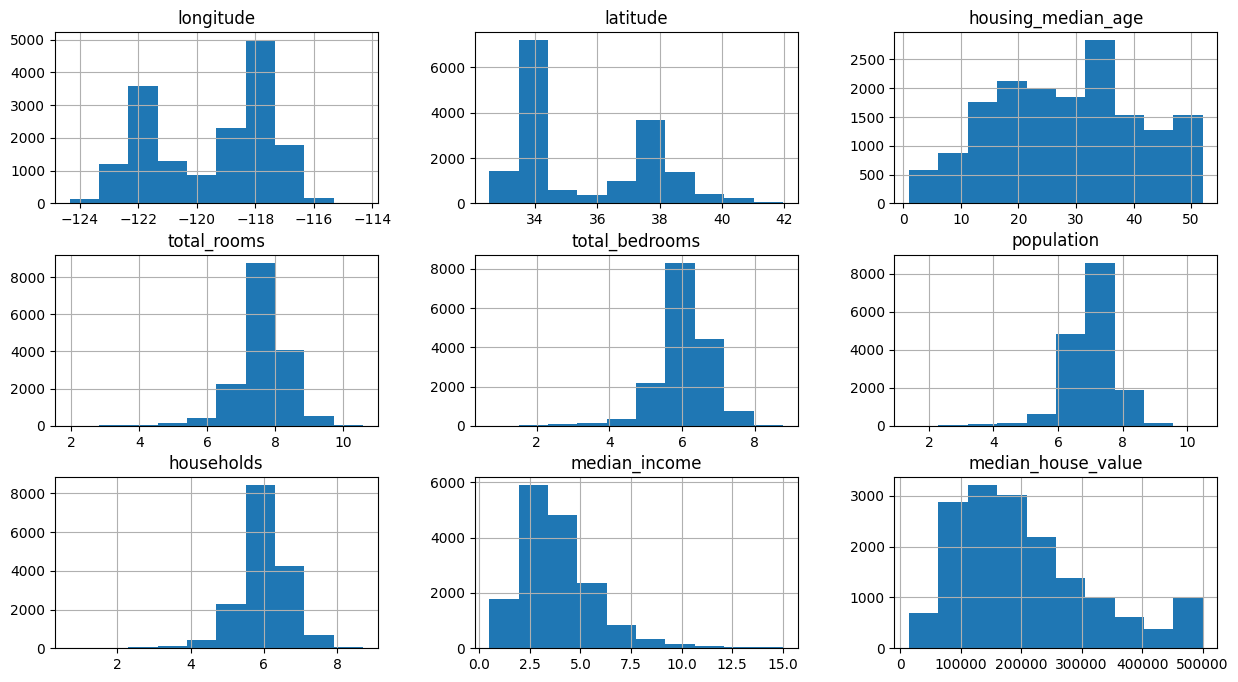

In [90]:
train_data.hist(figsize=(15, 8))

In [91]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7301
INLAND        5171
NEAR OCEAN    2100
NEAR BAY      1770
ISLAND           4
Name: count, dtype: int64

In [92]:
pd.get_dummies(train_data.ocean_proximity, dtype=int)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
1409,0,0,0,1,0
7583,1,0,0,0,0
15235,0,0,0,0,1
15290,0,0,0,0,1
17317,0,0,0,0,1
...,...,...,...,...,...
11119,1,0,0,0,0
14227,0,0,0,0,1
778,0,0,0,1,0
1490,0,0,0,1,0


In [93]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)
# train_data = train_data.drop(['ISLAND'], axis=1)

<Axes: >

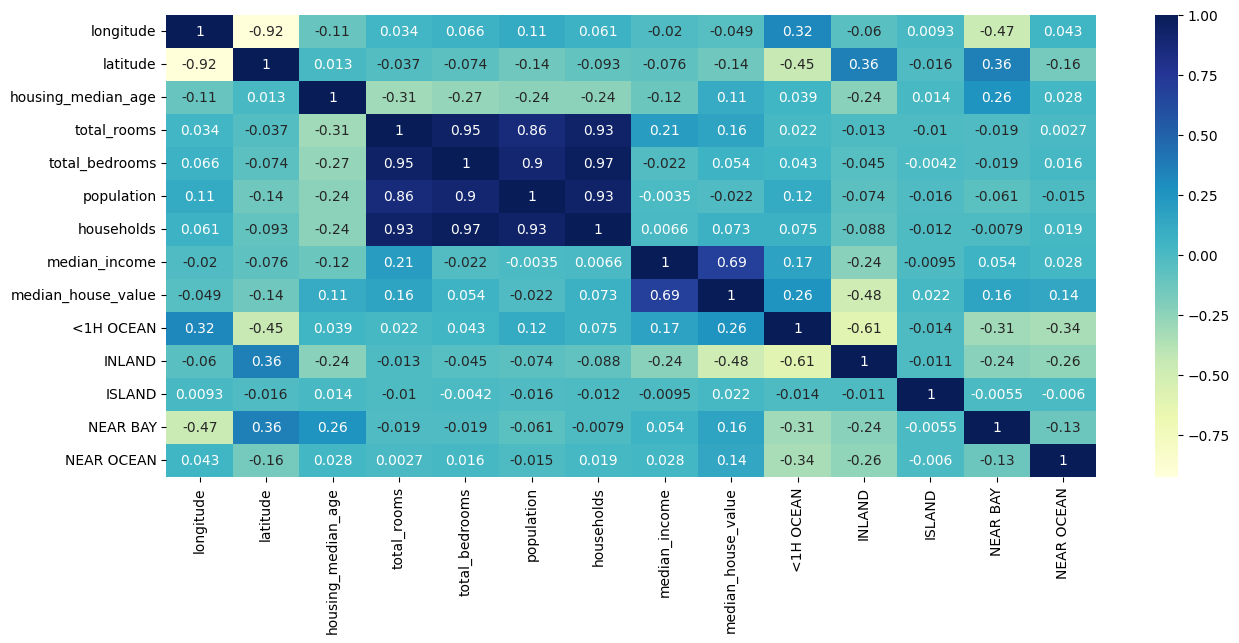

In [94]:
plt.figure(figsize=(15, 6))
sns.heatmap(train_data.corr(numeric_only=True), annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

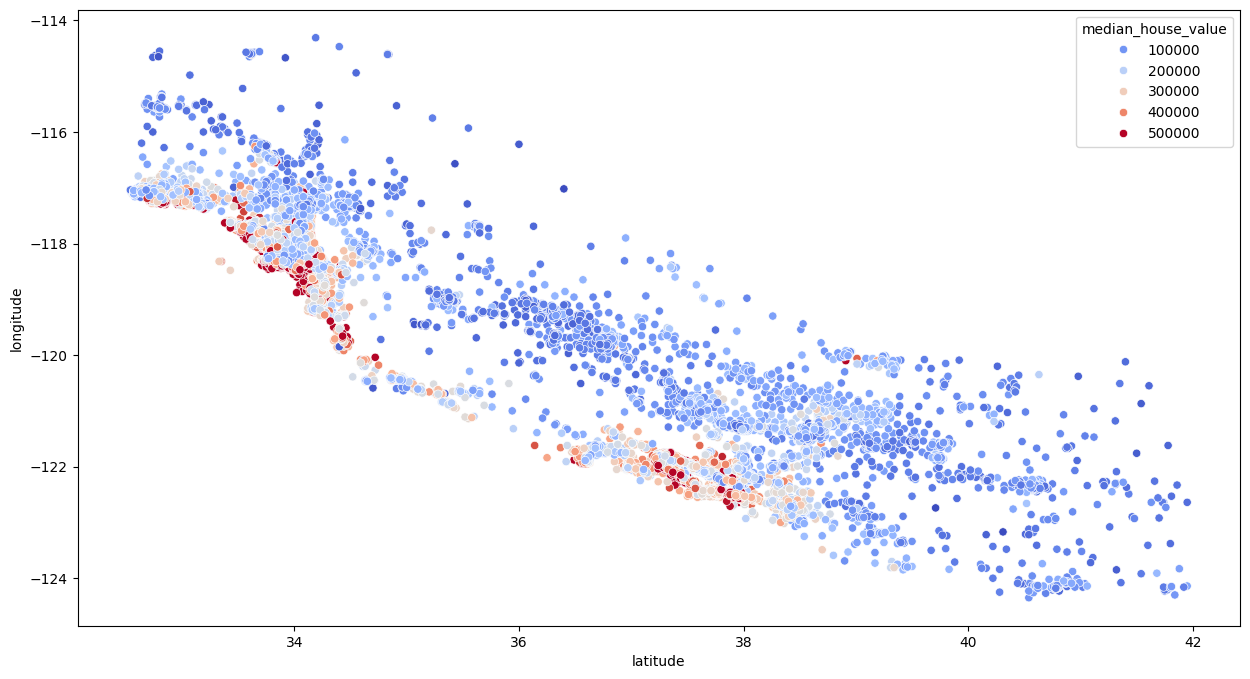

In [95]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y='longitude', data=train_data, hue = 'median_house_value', palette='coolwarm')

In [96]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<Axes: >

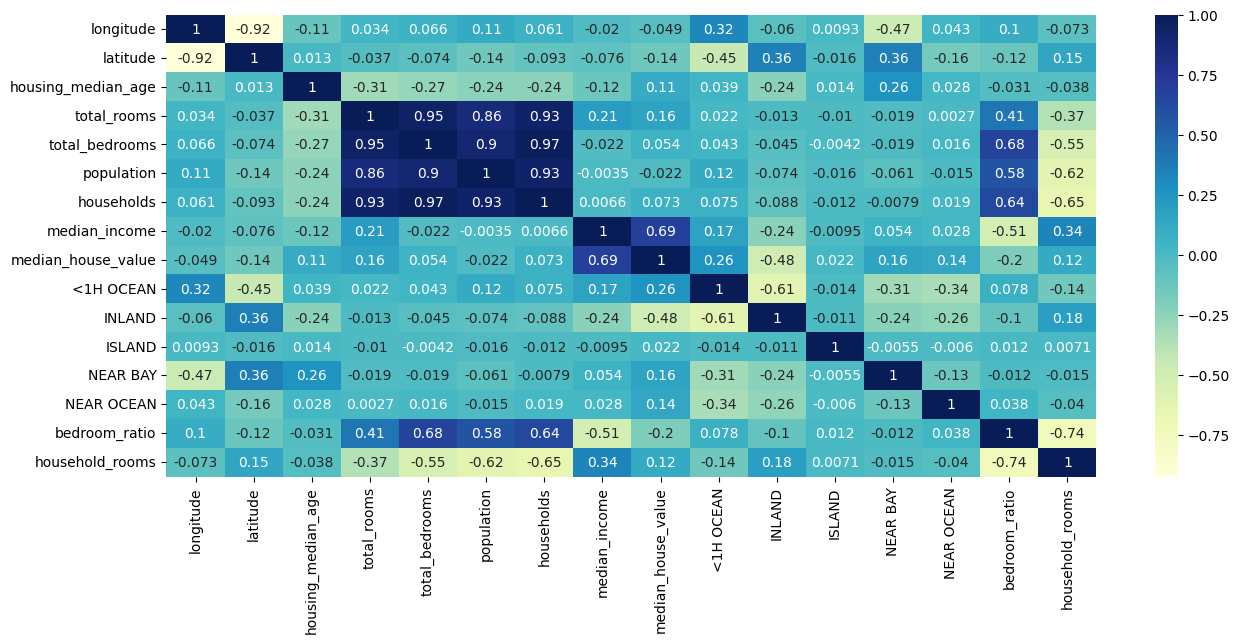

In [97]:
plt.figure(figsize=(15, 6))
sns.heatmap(train_data.corr(numeric_only=True), annot=True,cmap="YlGnBu")

In [104]:
from sklearn.linear_model import LinearRegression # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore


scaler = StandardScaler()
X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [105]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']

In [106]:
X_test, y_test = test_data.drop(["median_house_value"], axis=1), test_data['median_house_value']
X_test_s = scaler.fit_transform(X_test)

In [103]:
reg.score(X_test,y_test)

0.6676478730588113

# After Normalizing data

In [108]:
reg.fit(X_train_s, y_train)

LinearRegression()

In [109]:
reg.score(X_test_s, y_test)

0.6676307988350192

## RandomForest Regression

In [110]:
from sklearn.ensemble import RandomForestRegressor # type: ignore

forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [111]:
forest.score(X_test, y_test)

0.802738513410725

In [121]:
from sklearn.model_selection import GridSearchCV # type: ignore


forest = RandomForestRegressor()
param_grid = {
    "n_estimators":[100, 200, 300],
    "min_samples_split":[2, 4],
    "max_depth":[None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [122]:
best_forest = grid_search.best_estimator_
best_forest.score(X_test, y_test)

0.8058311973687969

In [130]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Applying ANN

In [133]:
model1 = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_s.shape[1],)), 
    Dense(64, activation='relu'),
    Dense(1)  
])

/home/james/anaconda3/envs/TensorFlow/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-10 20:19:22.946121: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-05-10 20:19:22.946272: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:134] retrieving CUDA diagnostic information for host: james
2024-05-10 20:19:22.946282: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:141] hostname: james
2024-05-10 20:19:22.946527: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:165] libcuda reported version is: 545.23.8
2024-05-10 20:19:22.946603: I external/local_xla/xla/stream_executor/cuda/cuda_diagnos

In [138]:
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
model1.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.2)  # X_train, y_train are your training data

# Evaluate the model
loss, mae = model1.evaluate(X_test, y_test)  # X_test, y_test are your test data

# Make predictions
predictions = model1.predict(X_test_s)  # X_new_data is your new data for prediction

Epoch 1/1000
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12418153472.0000 - mae: 87933.4219 - val_loss: 12149994496.0000 - val_mae: 87506.4922
Epoch 2/1000
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 11938679808.0000 - mae: 86129.4219 - val_loss: 12022005760.0000 - val_mae: 86965.8359
Epoch 3/1000
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 11937968128.0000 - mae: 86404.2656 - val_loss: 11884499968.0000 - val_mae: 86588.7969
Epoch 4/1000
409/409 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11729917952.0000 - mae: 85540.5625 - val_loss: 11739553792.0000 - val_mae: 86517.4297
Epoch 5/1000
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 11673079808.0000 - mae: 85781.7500 - val_loss: 11594114048.0000 - val_mae: 86449.2812
Epoch 6/1000
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 11395254272.0000 - mae: 84950.6953 - val_loss: 11413265408.0000 - val_mae: 85709.7266
Epoch 7/1000
409/409 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11341076480.0000 - mae: 84377.0078 - val_loss: 112

In [137]:
loss, mae

(11973629952.0, 86413.828125)